# Read in csv for route 4

In [519]:
#Read into a dataframe a CSV dataset
#Timestamp micro since 1970 01 01 00:00:00 GMT'
#Line ID
#Direction
#Journey Pattern ID
#Time Frame (The start date of the production time table - in Dublin the production time table starts at 6am and ends at 3am)
#Vehicle Journey ID (A given run on the journey pattern)
#Operator (Bus operator, not the driver)
#Congestion [0=no,1=yes]
#Lon WGS84'Lat WGS84'
#Delay (seconds, negative if bus is ahead of schedule)
#Block ID (a section ID of the journey pattern)
#Vehicle ID
#Stop ID
#At Stop [0=no,1=yes]

# the ultimate target feature: delay per stop

# Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime

%matplotlib inline

# Read csv file into a dataframe.
df = pd.read_csv('route4.csv')
df.head()

/Users/user/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
0,8,1356998427000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0
1,20,1356998427000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1
2,44,1356998485000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0
3,46,1356998485000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1
4,67,1356998546000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1


In [520]:
df.shape

(689030, 16)

# Add new features

In [521]:
# Data time

df["Time"] = pd.to_datetime(df['Timestamp']*1000, unit="ns")
df.head(2)


,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time
0,8,1356998427000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:00:27
1,20,1356998427000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:00:27


In [522]:
#binary feature - weekend

df['IsWeekend'] = np.where((df['Time'].dt.dayofweek > 5), 1, 0)

In [523]:
df.IsWeekend.unique()

array([0, 1])

In [524]:
#hour of day

df['HourOfDay'] = df['Time'].dt.hour

In [525]:
df.HourOfDay.unique()

array([ 0,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        6,  7,  1])

In [526]:
#binary feature - evening

df['IsEveningTime'] = np.where((df['Time'].dt.hour > 17), 1, 0)

In [527]:
df.IsEveningTime.unique()

array([0, 1])

In [528]:
#binary feature - peak hours

df['IsPeakTime'] = np.where(((df['HourOfDay'] >= 7) & (df['HourOfDay'] <= 10)) | ((df['HourOfDay'] >= 16) & (df['HourOfDay'] <= 19)), 1, 0)

In [529]:
df.IsPeakTime.unique()

array([0, 1])

In [530]:
#binary feature - school holiday

df['SchoolHoliday'] = np.where((df['Time'].dt.date == datetime(2012, 11, 1).date()) | (

df['Time'].dt.date == datetime(2012, 11, 2).date()) | (

                                       df['Time'].dt.date == datetime(2013, 1, 1).date()) | (

                                       df['Time'].dt.date == datetime(2013, 1, 2).date()) | (

                                       df['Time'].dt.date == datetime(2013, 1, 3).date()) | (

                                       df['Time'].dt.date == datetime(2013, 1, 4).date()), 1, 0)

In [531]:
df.SchoolHoliday.unique()

array([1, 0])

# Merge bus stop info

In [532]:
df_bus_stop = pd.read_csv('busstopinfo.csv', encoding='latin-1')
df_bus_stop

,stopid,displaystopid,shortname,fullname,latitude,longitude,lastupdated,OperatorName,route1,route2,...,route26,route27,route28,route29,route30,route31,route32,route33,route34,route35
0,2,2,Parnell Square,Parnell Square,53.352241,-6.263695,12/06/2017 08:09,bac,38,38A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3,Parnell Square,Parnell Square,53.352307,-6.263783,12/06/2017 08:09,bac,120,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4,Parnell Square,Parnell Square,53.352567,-6.264166,12/06/2017 08:09,bac,7,7B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,6,Parnell Square,Parnell Square,53.352744,-6.264443,12/06/2017 08:09,bac,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,7,Parnell Square,Parnell Square,53.352836,-6.264562,12/06/2017 08:09,bac,40,40B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,8,Parnell Square,Parnell Square,53.353281,-6.265155,12/06/2017 08:09,bac,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,10,Parnell Square,Parnell Square,53.353387,-6.265384,12/06/2017 08:09,bac,16C,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,11,Dorset St,Dorset St,53.357094,-6.264367,12/06/2017 08:09,bac,40B,40D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,12,Dorset St,Dorset St,53.356789,-6.264623,12/06/2017 08:09,bac,122,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14,14,Dorset St,Dorset St,53.358537,-6.262724,12/06/2017 08:09,bac,44,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [533]:
df_bus_stop_route4 = df_bus_stop.loc[(df_bus_stop.route1 == '4')]
df_bus_stop_route4

,stopid,displaystopid,shortname,fullname,latitude,longitude,lastupdated,OperatorName,route1,route2,...,route26,route27,route28,route29,route30,route31,route32,route33,route34,route35
3,6,6,Parnell Square,Parnell Square,53.352744,-6.264443,12/06/2017 08:09,bac,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,113,113,Ballymun Road,Ballymun Road,53.392269,-6.263688,12/06/2017 08:09,bac,4,42D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,115,115,Ballymun Road,Ballymun Road,53.387935,-6.265037,12/06/2017 08:09,bac,4,70D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,127,127,Ballymun Road,Ballymun Road,53.399107,-6.263668,12/06/2017 08:09,bac,4,17A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,147,147,Mobhi Road,Mobhi Road,53.372481,-6.265828,12/06/2017 08:09,bac,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,149,149,Mobhi Road,Mobhi Road,53.373138,-6.265969,12/06/2017 08:09,bac,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,185,185,Botanic Rd,Botanic Rd,53.368094,-6.270019,12/06/2017 08:09,bac,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,195,195,Phibsboro Road,Phibsboro Road,53.355000,-6.273500,29/05/2017 09:46,bac,4,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,197,197,Phibsboro Road,Phibsboro Road,53.358949,-6.273225,29/05/2017 09:46,bac,4,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,199,199,Phibsboro Road,Phibsboro Road,53.363615,-6.272286,29/05/2017 09:46,bac,4,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So there are 42 official Route 4 stops.

In [534]:
df_bus_stop_route4 = df_bus_stop_route4[['stopid', 'fullname']]
df_bus_stop_route4.head(2)

,stopid,fullname
3,6,Parnell Square
88,113,Ballymun Road


In [535]:
#df_bus_stop_route4['first_stop_northbound']=np.where((df['Stop_ID']== 1.05 ) ,1,0)

In [536]:
df_bus_stop_route4 = df_bus_stop_route4.rename(columns={'stopid': 'Stop_ID'})

In [537]:
df = pd.merge(df, df_bus_stop_route4, on=['Stop_ID'])
df.shape

(281740, 23)

In [538]:
df.Time.head(2)

0   2013-01-01 00:00:27
1   2013-01-01 00:01:25
Name: Time, dtype: datetime64[ns]

# Merge weather data

In [539]:
df_weather = pd.read_csv('weather_data.csv', encoding='latin-1')
df_weather.head()

,Date,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?
0,01/11/2012 00:00:00,0.0,0.8,NaN,NaN,976.2,0,0
1,01/11/2012 01:00:00,0.0,1.3,6.4,95.0,976.0,0,0
2,01/11/2012 02:00:00,0.0,1.5,6.5,94.0,976.2,0,0
3,01/11/2012 03:00:00,0.0,0.8,6.2,95.0,976.3,0,0
4,01/11/2012 04:00:00,0.0,1.1,6.4,96.0,976.1,0,0


In [540]:
df_weather.columns

Index(['Date', 'Precipitation (mm)', 'Temperature C',
       'Vapour Pressure (hPa)                ', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Rainfall (Yes or No)',
       'Over 1mm Rain?'],
      dtype='object')

In [541]:
df_weather = df_weather.rename(columns={'Date': 'Time'})
df_weather['Time'] = pd.to_datetime(df_weather['Time'])
df_weather.sort_values(['Time'], ascending=[True], inplace=True)
df_weather['HourOfDay'] = df_weather['Time'].dt.hour
df_weather.head(2)

,Time,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?,HourOfDay
0,2012-01-11 00:00:00,0.0,0.8,NaN,NaN,976.2,0,0,0
1,2012-01-11 01:00:00,0.0,1.3,6.4,95.0,976.0,0,0,1


In [542]:
df.sort_values(['Time'], ascending=[True], inplace=True)
df_weather.sort_values(['Time'], ascending=[True], inplace=True)
df =  pd.merge_asof(df, df_weather, on='Time')
df.columns

Index(['Unnamed: 0', 'Timestamp', 'LineID', 'Direction', 'Journey_Pattern_ID',
       'Timeframe', 'Vehicle_Journey_ID', 'Operator', 'Congestion', 'Lon',
       'Lat', 'Delay', 'Block_ID', 'Vehicle_ID', 'Stop_ID', 'At_Stop', 'Time',
       'IsWeekend', 'HourOfDay_x', 'IsEveningTime', 'IsPeakTime',
       'SchoolHoliday', 'fullname', 'Precipitation (mm)', 'Temperature C',
       'Vapour Pressure (hPa)                ', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Rainfall (Yes or No)',
       'Over 1mm Rain?', 'HourOfDay_y'],
      dtype='object')

In [543]:
#code from here: https://stackoverflow.com/questions/27313647/merging-two-pandas-dataframes-results-in-duplicate-columns

def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df.columns

Index(['Unnamed: 0', 'Timestamp', 'LineID', 'Direction', 'Journey_Pattern_ID',
       'Timeframe', 'Vehicle_Journey_ID', 'Operator', 'Congestion', 'Lon',
       'Lat', 'Delay', 'Block_ID', 'Vehicle_ID', 'Stop_ID', 'At_Stop', 'Time',
       'IsWeekend', 'HourOfDay_x', 'IsEveningTime', 'IsPeakTime',
       'SchoolHoliday', 'fullname', 'Precipitation (mm)', 'Temperature C',
       'Vapour Pressure (hPa)                ', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Rainfall (Yes or No)',
       'Over 1mm Rain?'],
      dtype='object')

In [544]:
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(df)
df.columns

Index(['Unnamed: 0', 'Timestamp', 'LineID', 'Direction', 'Journey_Pattern_ID',
       'Timeframe', 'Vehicle_Journey_ID', 'Operator', 'Congestion', 'Lon',
       'Lat', 'Delay', 'Block_ID', 'Vehicle_ID', 'Stop_ID', 'At_Stop', 'Time',
       'IsWeekend', 'HourOfDay', 'IsEveningTime', 'IsPeakTime',
       'SchoolHoliday', 'fullname', 'Precipitation (mm)', 'Temperature C',
       'Vapour Pressure (hPa)                ', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Rainfall (Yes or No)',
       'Over 1mm Rain?'],
      dtype='object')

# Dropping duplicates

In [545]:
df=df.drop_duplicates(keep='first')
df.shape

(277609, 30)

There are no duplicates after merging on Stop_ID

In [546]:
#df.T.drop_duplicates().T
#df.shape

In [547]:
df.describe()

,Unnamed: 0,Timestamp,LineID,Direction,Vehicle_Journey_ID,Congestion,Lon,Lat,Delay,Block_ID,...,IsEveningTime,IsPeakTime,SchoolHoliday,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?
count,2.776090e+05,2.776090e+05,277609.0,277609.0,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,...,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000,277609.000000
mean,8.108003e+05,1.358304e+15,4.0,0.0,14691.484199,0.001293,-6.226622,53.346136,-106.515805,13059.214381,...,0.303067,0.533963,0.140673,0.128934,4.870802,7.271984,82.968193,1009.235134,0.170124,0.039282
std,4.792244e+05,7.384720e+11,0.0,0.0,90437.362375,0.035938,0.049220,0.048252,414.392095,85520.175041,...,0.459585,0.498846,0.347684,0.451413,2.599290,1.224422,6.218511,10.349945,0.375743,0.194265
min,2.000000e+00,1.356998e+15,4.0,0.0,4229.000000,0.000000,-6.312333,53.285683,-2516.000000,4001.000000,...,0.000000,0.000000,0.000000,0.000000,-3.800000,4.500000,58.000000,980.800000,0.000000,0.000000
25%,4.113210e+05,1.357671e+15,4.0,0.0,4569.000000,0.000000,-6.268298,53.296730,-296.000000,4003.000000,...,0.000000,0.000000,0.000000,0.000000,3.100000,6.400000,82.000000,1000.500000,0.000000,0.000000
50%,7.518540e+05,1.358318e+15,4.0,0.0,4900.000000,0.000000,-6.258871,53.347176,-12.000000,4005.000000,...,0.000000,1.000000,0.000000,0.000000,5.800000,7.600000,82.000000,1012.700000,0.000000,0.000000
75%,1.229562e+06,1.358935e+15,4.0,0.0,4945.000000,0.000000,-6.170437,53.397099,35.000000,4009.000000,...,1.000000,1.000000,0.000000,0.000000,5.800000,7.600000,87.000000,1018.700000,0.000000,0.000000
max,1.733537e+06,1.359631e+15,4.0,0.0,999254.000000,1.000000,-6.134333,53.418999,5550.000000,822025.000000,...,1.000000,1.000000,1.000000,4.000000,13.900000,13.300000,100.000000,1021.900000,1.000000,1.000000


# Checking for constant columns - cardinality = 1

In [548]:
for column in df.columns:
    print(column + "," + str(len(df[column].unique())))

Unnamed: 0,256181
Timestamp,214566
LineID,1
Direction,1
Journey_Pattern_ID,7
Timeframe,32
Vehicle_Journey_ID,536
Operator,4
Congestion,2
Lon,17683
Lat,15579
Delay,3333
Block_ID,42
Vehicle_ID,114
Stop_ID,37
At_Stop,2
Time,214566
IsWeekend,2
HourOfDay,19
IsEveningTime,2
IsPeakTime,2
SchoolHoliday,2
fullname,20
Precipitation (mm),23
Temperature C,120
Vapour Pressure (hPa)                ,65
Relative Humidity (%),38
Mean Sea Level Pressure (hPa),220
Rainfall (Yes or No),2
Over 1mm Rain?,2


The direction is constant, the line ID is only constant due to a filter.

In [549]:
df = df.drop('Direction', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [550]:
#congestion rarely not 0
df = df.drop('Congestion', axis=1)

# Notes on missing values

In [551]:
df.isnull().sum()

Timestamp                                0
LineID                                   0
Journey_Pattern_ID                       2
Timeframe                                0
Vehicle_Journey_ID                       0
Operator                                 0
Lon                                      0
Lat                                      0
Delay                                    0
Block_ID                                 0
Vehicle_ID                               0
Stop_ID                                  0
At_Stop                                  0
Time                                     0
IsWeekend                                0
HourOfDay                                0
IsEveningTime                            0
IsPeakTime                               0
SchoolHoliday                            0
fullname                                 0
Precipitation (mm)                       0
Temperature C                            0
Vapour Pressure (hPa)                    0
Relative Hu

It does not appear that any feature has so many missing values that the feature should be dropped right now. So there is no missing value work at the outset. 

# However the string 'null' is a known issue for journey ID - for now remove rows with null. 

In [552]:
df[df.Journey_Pattern_ID != 'null'].shape

(232614, 27)

Journey pattern ID is null for 232k out of the sample - about 30%

In [553]:
df.Operator.unique()

array(['HN', 'D1', 'SL', 'D2'], dtype=object)

This represents bus depot operator (HN being Harristown)

In [554]:
df.Timeframe.unique()

array(['2012-12-31', '2013-01-01', '2013-01-02', '2013-01-03',
       '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
       '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
       '2013-01-12', '2013-01-13', '2013-01-14', '2013-01-15',
       '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-19',
       '2013-01-20', '2013-01-21', '2013-01-22', '2013-01-23',
       '2013-01-24', '2013-01-25', '2013-01-26', '2013-01-27',
       '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31'], dtype=object)

Timeframe is merely date. 

In [555]:
df.Block_ID.unique()

array([  4001,   4012,   4002,   4003,   4004,   4005,   4007,   4008,
         4009,   4006,   4010, 822025,   4011,   4070,   4075,   4015,
         4017,   4013,   4014,   4016,   4018,   4099,  40312,  40507,
         4090,   4085,   4091,   4019,   4508,   4501,   4020,   4021,
         4069,   4068,   4022,   4023,   4071,   4072,   4076,   4312,
         4507,   4024])

Although block ID has 42 unique values, being in line with number of stops intuitively meaning block between stops, this is not a fully understood column as the journey ID does not seem to start or end with block ID consistenty on northbound or southbound routes. More further on individual journey analysis. 

In [556]:
df.Journey_Pattern_ID.unique()

array(['null', '00041002', '00040001', '00041001', '00040002', '033X1001',
       nan], dtype=object)

So journey pattern ID relates to Block ID as there is a similar pattern but only a selection of block IDs are used. 

Issue is equating the number of journey patters to either daily schedules (weekday, sat, sun, BH perhaps?), directional schedules or variations of the bus route (4A for example). 

In [557]:
df.Stop_ID.unique()

array(['7226', '281', '324', '7113', '127', '113', '115', '147', '185',
       '7457', '273', '408', '410', '412', '414', '416', '418', '420',
       '424', '426', '428', '6334', '3116', '6085', '7330', '3162', '3164',
       '6', '195', '197', '199', '201', '149', '322', '332', '4705', '422'], dtype=object)

In [558]:
df['Block_ID'].groupby(df['Journey_Pattern_ID']).count().T

Journey_Pattern_ID
00040001    131785
00040002       871
00041001     98908
00041002      1041
033X1001         7
null         44995
Name: Block_ID, dtype: int64


To find out: Why are there 242 unique stop IDs when the number 4 does not have 242 stops?

Why are we seeing 'nan' here when we have converted to string - what is this and what does this feature really represent:

Is it days of the week schedules (sat/BH/sun/weekday etc)? 
Is it variants on the routes?

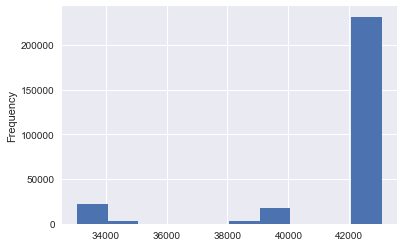

In [559]:
df['Vehicle_ID'].plot(kind='hist')

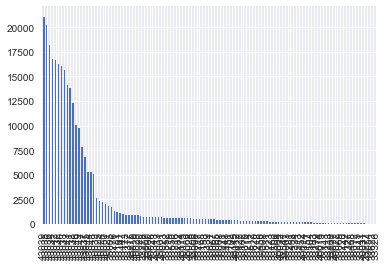

In [560]:
df['Vehicle_ID'].value_counts().plot(kind='bar')

Perhaps these do represent direction given there are no variants on the route (A/B etc) decommissioned 4A in 2010 according to this http://www.boards.ie/vbulletin/showthread.php?t=2056040487

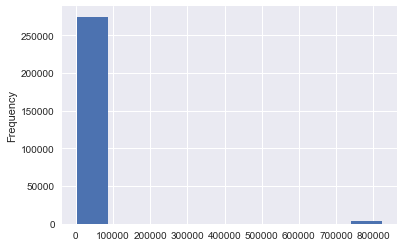

In [561]:
df['Block_ID'].plot(kind='hist')

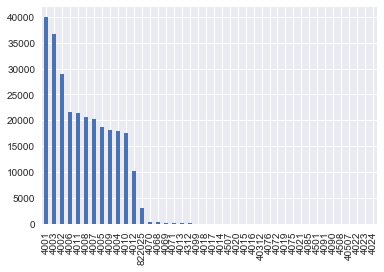

In [562]:
df['Block_ID'].value_counts().plot(kind='bar')

# Dropping constant columns

Direction is a constant - that is unexpected
Line is constant as we filtered for line

In [563]:
df = df.drop('LineID', 1)
df.shape

(277609, 26)

# Group continuous and categorical data 

In [564]:
#as we are seeing 'mixed types' warning for column 14 checking the data types:
df.dtypes

Timestamp                                         int64
Journey_Pattern_ID                               object
Timeframe                                        object
Vehicle_Journey_ID                                int64
Operator                                         object
Lon                                             float64
Lat                                             float64
Delay                                             int64
Block_ID                                          int64
Vehicle_ID                                        int64
Stop_ID                                          object
At_Stop                                           int64
Time                                     datetime64[ns]
IsWeekend                                         int64
HourOfDay                                         int64
IsEveningTime                                     int64
IsPeakTime                                        int64
SchoolHoliday                                   

In [565]:
df['Stop_ID'] = df['Stop_ID'].astype('category')
df['fullname'] = df['fullname'].astype('category')
df['Journey_Pattern_ID'] = df['Journey_Pattern_ID'].astype('category')
df['Vehicle_Journey_ID'] = df['Vehicle_Journey_ID'].astype('category')
df['Timeframe'] = df['Timeframe'].astype('category')
df['IsWeekend'] = df['IsWeekend'].astype('category')
df['HourOfDay'] = df['HourOfDay'].astype('category')
df['IsEveningTime'] = df['IsEveningTime'].astype('category')
df['SchoolHoliday'] = df['SchoolHoliday'].astype('category')
df['IsPeakTime'] = df['IsPeakTime'].astype('category')
df['Time'] = df['Time'].astype('category')
df['Block_ID'] = df['Block_ID'].astype('category')
df['Vehicle_ID'] = df['Vehicle_ID'].astype('category')
df['Congestion'] = df['Congestion'].astype('category')
df['Operator'] = df['Operator'].astype('category')
df['At_Stop'] = df['At_Stop'].astype('category')
categorical_columns = df.select_dtypes(['category']).columns
continuous_columns = df.select_dtypes(['int64', 'float64']).columns

KeyError: 'Congestion'

In [584]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Journey_Pattern_ID,277607,6,00040001,131785
Start_date,277609,32,2013-01-02,12446
Vehicle_Journey_ID,277609,536,4573,3246
Vehicle_ID,277609,114,43039,21106
Stop_ID,277609,37,7330,34054
Time,277609,214566,2013-01-28 13:11:51,12
IsWeekend,277609,2,0,261433
HourOfDay,277609,19,18,21228
IsEveningTime,277609,2,0,193475
IsPeakTime,277609,2,1,148233


In [585]:
df.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Delay,277609.0,-106.515805,414.392095,-2516.0,-296.0,-12.0,35.0,5550.0
At_Stop,277609.0,0.297109,0.456986,0.0,0.0,0.0,1.0,1.0
Precipitation (mm),277609.0,0.128934,0.451413,0.0,0.0,0.0,0.0,4.0
Temperature C,277609.0,4.870802,2.599290,-3.8,3.1,5.8,5.8,13.9
Vapour Pressure (hPa),277609.0,7.271984,1.224422,4.5,6.4,7.6,7.6,13.3
Relative Humidity (%),277609.0,82.968193,6.218511,58.0,82.0,82.0,87.0,100.0
Mean Sea Level Pressure (hPa),277609.0,1009.235134,10.349945,980.8,1000.5,1012.7,1018.7,1021.9
Rainfall (Yes or No),277609.0,0.170124,0.375743,0.0,0.0,0.0,0.0,1.0
Over 1mm Rain?,277609.0,0.039282,0.194265,0.0,0.0,0.0,0.0,1.0
Direction_Northbound,277609.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Looking into the journey pattern ID in order to establish what it means

# First run a given run on a route and investigate journey pattern ID vs other features

# Journey Pattern ID 00040001 - southbound bus - appears to be peak schedule

In [586]:
df_subset = df.loc[(df.Vehicle_ID == 43042) & (df.Vehicle_Journey_ID == 4915) & (df.Timeframe == '2013-01-31')]
df_subset

AttributeError: 'DataFrame' object has no attribute 'Timeframe'

In [ ]:
df_subset.shape

In [ ]:
for column in df_subset.columns:
    print(column + "," + str(len(df_subset[column].unique())))

Comments: timestamps are out of order, this subset starts later than it finishes. 
The delay of being 49 seconds ahead of schedule is not in line with the 1 hour schedule from Harristown to Monkstown. So the delay is against a schedule of 1 hour 30 minutes. This is a peak time - Thursday 31/1/2013. 
Block ID: 4010 - stays constant
Journey pattern ID: 00040001
This is a Southbound bus.

In [ ]:
df_subset1 = df.loc[(df.Vehicle_ID == 33219) & (df.Vehicle_Journey_ID == 963581) & (df.Timeframe == '2013-01-31') ]
df_subset1.to_csv("southbound.csv", encoding='utf-8', index=False)

In [ ]:
for column in df_subset1.columns:
    print(column + "," + str(len(df_subset1[column].unique())))

Comments: the timestamps are out of order again, so the bus in fact finishes at 11.08 on the Monkstown Link Road, not at 10:55 on Merrion Road.
The journey delay is 25 mins ahead of schedule for a trip that began at 10.02 and finished at 11.08 which indicates that the 1 hour published schedule is not right as we should be 6 minutes behind schedule - clearly the real expected time was an hour and a half here - that is the same as the example above but this is much later in the morning - should adhere to the offpeak schedule?
Again this is a southbound bus, so comparable to the journey above except for peak/offpeak.
Again block ID is constant but for the same jouney in same direction it is 4069 - so different. 
Therefore block ID cannot represent the section of the journey pattern as per the instructions given on Moodle. But journey pattern ID is still 00040001 - so that is a bus from Harristown to Monkstown.
Congestion is zero even though this is a peak time bus run so not clear what drives the congestion column. 

# Journey Pattern ID 00041002 - northbound bus - offpeak schedule

In [ ]:
df_subset2 = df.loc[(df.Vehicle_ID == 43044) & (df.Vehicle_Journey_ID == 4599) & (df.Timeframe == '2013-01-03')]
df_subset2.head(2)

In [ ]:
for column in df_subset2.columns:
    print(column + "," + str(len(df_subset2[column].unique())))

Comments: again the timestamps are out of order. This is a Northbound bus. We lose it due to date filter near the end of it's trip. However it has travelled from Monkstown to O'Connell Street in 30 mins so it seems to be going on the offpeak scedule - 1 hour. 
The Northbound journey pattern ID is  	00041002.
The block ID is constant but unrelated to journey pattern at: 4012
HN - Harristown is the operator even though this but is travelling in the opposite direction - so operator is not reflective of starting bus depot - just the operator depot for this route it seems. Note this is the last run of a day (the 11.30pm bus).

# Journey Pattern ID 00041001 - northbound bus - offpeak schedule

In [ ]:
df_subset3 = df.loc[(df.Vehicle_ID == 43039) & (df.Vehicle_Journey_ID == 4954) & (df.Timeframe == '2013-01-31')]
df_subset3.to_csv("northbound.csv", encoding='utf-8', index=False)

This bus is going Northbound, but cuts off around 11AM.
Possibly one of the filters changes at 11AM.

In [566]:
df_subset3 = df.loc[ (df.Vehicle_Journey_ID == 4954) & (df.Timeframe == '2013-01-31')]
df_subset3.head(2)

,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Lon,Lat,Delay,Block_ID,Vehicle_ID,...,IsPeakTime,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?
281437,1359629257000000,00041001,2013-01-31,4954,HN,-6.157933,53.287117,47,4007,43039,...,1,0,Monkstown Ave,0.0,6.1,7.5,79.0,1004.9,0,0
281462,1359629401000000,00041001,2013-01-31,4954,HN,-6.166802,53.290535,-17,4007,43039,...,1,0,Rowan Pk,0.0,6.1,7.5,79.0,1004.9,0,0


In [567]:
for column in df_subset3.columns:
    print(column + "," + str(len(df_subset3[column].unique())))

Timestamp,13
Journey_Pattern_ID,1
Timeframe,1
Vehicle_Journey_ID,1
Operator,1
Lon,10
Lat,10
Delay,9
Block_ID,1
Vehicle_ID,1
Stop_ID,4
At_Stop,2
Time,13
IsWeekend,1
HourOfDay,1
IsEveningTime,1
IsPeakTime,1
SchoolHoliday,1
fullname,4
Precipitation (mm),1
Temperature C,1
Vapour Pressure (hPa)                ,1
Relative Humidity (%),1
Mean Sea Level Pressure (hPa),1
Rainfall (Yes or No),1
Over 1mm Rain?,1


No, having tried without the filters this bus stops on Rock Road only 12 minutes into its journey. 
GPS tracking issues?
This bus is different on Journey Pattern ID to the previous northbound buses, its Journey Pattern ID is 00041001. Also as before the block ID is constant but not in line with other journeys in same area/direction 4007.

In [568]:
df_subset4 = df.loc[(df.Vehicle_ID == 43046) & (df.Vehicle_Journey_ID == 15476) & (df.Timeframe == '2013-01-01')]
df_subset4.head(2)

,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Lon,Lat,Delay,Block_ID,Vehicle_ID,...,IsPeakTime,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?
352,1357032623000000,null,2013-01-01,15476,HN,-6.155856,53.287834,0,4001,43046,...,1,1,Monkstown Ave,0.0,2.0,6.3,89.0,1007.1,0,0
354,1357032644000000,00041001,2013-01-01,15476,HN,-6.155856,53.287834,0,4001,43046,...,1,1,Monkstown Ave,0.0,2.0,6.3,89.0,1007.1,0,0


This is a northbound bus - taking approx 58 minutes but coming in at only 19 seconds ahead of schedule. This was a bank holiday so this bus is travelling in non peak period. What is driving the different Journey Pattern ID _ possibly the non - peak period. It travels the same route with the same operator. The block ID is 4001 so it does tie into the Journey_Pattern_ID this time, unlike before. 


# Journey Pattern ID 00040002 - southbound bus - offpeak schedule

In [569]:
#df[df['Journey_Pattern_ID'] == '00040002']

In [570]:
df_subset5 = df.loc[(df.Vehicle_ID == 43047) & (df.Vehicle_Journey_ID == 4570) & (df.Timeframe == '2013-01-25')]
df_subset5.head(2)

,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Lon,Lat,Delay,Block_ID,Vehicle_ID,...,IsPeakTime,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?
241637,1359156534000000,null,2013-01-25,4570,HN,-6.277417,53.417099,0,4003,43047,...,0,0,Harristown,0.0,5.9,7.0,74.0,1000.1,0,0
241640,1359156554000000,00040002,2013-01-25,4570,HN,-6.278478,53.417950,-51,4003,43047,...,0,0,Harristown,0.0,5.9,7.0,74.0,1000.1,0,0


Friday 25 Jan 2013 was a Friday but this is an offpeak bus.  It drops off at 11.51pm which is too early to be because of the date in the filter. It is a Southbound bus, last of the day. 

In [571]:
df_subset6 = df.loc[(df.Vehicle_ID == 43048) & (df.Vehicle_Journey_ID == 4570) & (df.Timeframe == '2013-01-02')]
df_subset6

,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Lon,Lat,Delay,Block_ID,Vehicle_ID,...,IsPeakTime,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?
20585,1357169403000000,null,2013-01-02,4570,HN,-6.278520,53.417770,0,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20589,1357169429000000,00040002,2013-01-02,4570,HN,-6.278520,53.417770,0,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20592,1357169450000000,00040002,2013-01-02,4570,HN,-6.278520,53.417770,0,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20594,1357169462000000,00040002,2013-01-02,4570,HN,-6.272386,53.417824,0,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20596,1357169470000000,00040002,2013-01-02,4570,HN,-6.272386,53.417824,0,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20599,1357169493000000,00040002,2013-01-02,4570,HN,-6.272386,53.417824,0,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20601,1357169512000000,00040002,2013-01-02,4570,HN,-6.278516,53.417789,107,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20604,1357169530000000,00040002,2013-01-02,4570,HN,-6.278516,53.417789,107,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20610,1357169570000000,00040002,2013-01-02,4570,HN,-6.278516,53.417789,107,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0
20612,1357169584000000,00040002,2013-01-02,4570,HN,-6.270968,53.417747,107,4003,43048,...,0,1,Harristown,0.0,5.8,7.6,82.0,1018.7,0,0


This bus has same vehicle journey ID on a different date - but it is the last bus Southbound for the day. Again it drops off when it reaches Parnell Square, not making the full journey. 


# Have established that the 5th number in Journey Pattern ID indicates direction - 0 southbound, 1 northbound

In [572]:
#splice direction from JourneyPatternID and create new binary column
df["Direction_Northbound"] =  np.where((df["Journey_Pattern_ID"].str[5] == '1'),1, 0)
df.head()

,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Lon,Lat,Delay,Block_ID,Vehicle_ID,...,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?,Direction_Northbound
0,1356998427000000,null,2012-12-31,4243,HN,-6.279000,53.416683,0,4001,43043,...,1,Monkstown Ave,0.0,3.1,6.8,88.0,1000.2,0,0,0
1,1356998427000000,00041002,2012-12-31,4599,HN,-6.277317,53.415817,0,4012,43035,...,1,O'Connell St,0.0,3.1,6.8,88.0,1000.2,0,0,0
4,1356998485000000,00041002,2012-12-31,4599,HN,-6.277317,53.415817,0,4012,43035,...,1,O'Connell St,0.0,3.1,6.8,88.0,1000.2,0,0,0
5,1356998485000000,null,2012-12-31,4243,HN,-6.279000,53.416683,0,4001,43043,...,1,Monkstown Ave,0.0,3.1,6.8,88.0,1000.2,0,0,0
8,1356998546000000,null,2012-12-31,4243,HN,-6.279000,53.416683,0,4001,43043,...,1,Monkstown Ave,0.0,3.1,6.8,88.0,1000.2,0,0,0


# Block ID Analysis

In [573]:
block_df = df[df['Block_ID'] == 4001]
block_df.head(2)

,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Lon,Lat,Delay,Block_ID,Vehicle_ID,...,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?,Direction_Northbound
0,1356998427000000,null,2012-12-31,4243,HN,-6.279,53.416683,0,4001,43043,...,1,Monkstown Ave,0.0,3.1,6.8,88.0,1000.2,0,0,0
5,1356998485000000,null,2012-12-31,4243,HN,-6.279,53.416683,0,4001,43043,...,1,Monkstown Ave,0.0,3.1,6.8,88.0,1000.2,0,0,0


In [574]:
for column in block_df.columns:
    print(column + "," + str(len(block_df[column].unique())))

Timestamp,39957
Journey_Pattern_ID,3
Timeframe,32
Vehicle_Journey_ID,75
Operator,1
Lon,9624
Lat,8980
Delay,1893
Block_ID,1
Vehicle_ID,40
Stop_ID,37
At_Stop,2
Time,39957
IsWeekend,2
HourOfDay,19
IsEveningTime,2
IsPeakTime,2
SchoolHoliday,2
fullname,20
Precipitation (mm),23
Temperature C,120
Vapour Pressure (hPa)                ,65
Relative Humidity (%),38
Mean Sea Level Pressure (hPa),220
Rainfall (Yes or No),2
Over 1mm Rain?,2
Direction_Northbound,1


Notes: This highlights nothing about the use of block ID. We may not need it. 

# Drop for now - not for good

In [575]:
df = df.drop('Lat', axis=1)

In [576]:
df = df.drop('Lon', axis=1)

In [577]:
df = df.drop('Timestamp', axis=1)

In [578]:
df = df.drop('Block_ID', axis=1)

In [579]:
df = df.rename(columns={'Timeframe': 'Start_date'})

In [580]:
df.head(2)

,Journey_Pattern_ID,Start_date,Vehicle_Journey_ID,Operator,Delay,Vehicle_ID,Stop_ID,At_Stop,Time,IsWeekend,...,SchoolHoliday,fullname,Precipitation (mm),Temperature C,Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Rainfall (Yes or No),Over 1mm Rain?,Direction_Northbound
0,null,2012-12-31,4243,HN,0,43043,7226,0,2013-01-01 00:00:27,0,...,1,Monkstown Ave,0.0,3.1,6.8,88.0,1000.2,0,0,0
1,00041002,2012-12-31,4599,HN,0,43035,281,1,2013-01-01 00:00:27,0,...,1,O'Connell St,0.0,3.1,6.8,88.0,1000.2,0,0,0


In [581]:
df.columns

Index(['Journey_Pattern_ID', 'Start_date', 'Vehicle_Journey_ID', 'Operator',
       'Delay', 'Vehicle_ID', 'Stop_ID', 'At_Stop', 'Time', 'IsWeekend',
       'HourOfDay', 'IsEveningTime', 'IsPeakTime', 'SchoolHoliday', 'fullname',
       'Precipitation (mm)', 'Temperature C',
       'Vapour Pressure (hPa)                ', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Rainfall (Yes or No)',
       'Over 1mm Rain?', 'Direction_Northbound'],
      dtype='object')

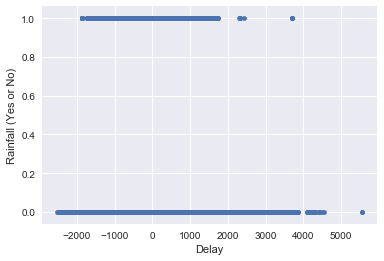

In [582]:
df.plot(kind='scatter', x='Delay', y='Rainfall (Yes or No)')

KeyError: 'IsWeekend'

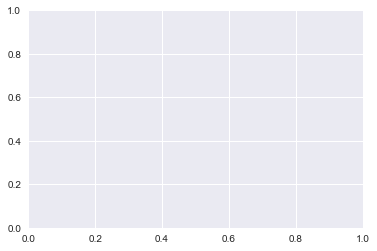

In [583]:
df.plot(kind='scatter', x='Delay', y='IsWeekend')

In [ ]:
df.plot(kind='scatter', x='Delay', y='IsPeakTime')

In [ ]:
df.plot(kind='scatter', x='Delay', y='SchoolHoliday')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
import statsmodels.formula.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Creating a new binary column 'Amazon_bias'
# This assigns a 1 to all cells which are FulfilledByAmazon and have Max Shipping Hours under 300, and a 0 to the rest

mod_1 = sm.ols(formula="Delay ~ C(IsPeakTime) -1 + C(IsWeekend) -1", data=df).fit()
print(check3.summary())


Jarque-Bera - means this data is not normally distributed using the inputs - so linear regression is useless as it relies on that assumption. Backed up by Omnibus vaue 
R squared with 1 being best and 0 being worst is v good at .96
P values v good at 0
A prefered model should have a minimum AIC value - this is good at -1.2.
Small confidence intervals that do not cross zero

#Noting that the issue is that the 'delay' itself is invalid as not operating off 60 minutes in all cases but that is out of scope for first iteration model.

In [ ]:
# Checking the predictions
Delay_predicted = ((mod_1.predict(df)) > 100) * 1.0
df['Delay_predicted'] = Delay_predicted

pd.crosstab([df["Delay"]>1],[df["Delay_predicted"]],margins=True)

In [ ]:
df_new = df
df_new.index
